In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
analysis_gene_names = ['MBP', 'QKI', 'ENPP2']
genes = dict()
for gene_name in analysis_gene_names:
    genes[gene_name] = pd.read_csv('tmp/related_genes_{}.csv'.format(gene_name))
    genes[gene_name]['value'] /= genes[gene_name]['value'].max()
    genes[gene_name]['category'] = gene_name

genes = pd.concat(list(genes.values()))
genes

,index,value,name,category
0,18428,1.000000,PCDH9,MBP
1,15794,0.556594,MALAT1,MBP
2,28301,0.306836,PLP1,MBP
3,7226,0.305288,SPOCK3,MBP
4,15663,0.271664,FTH1,MBP
...,...,...,...,...
29115,726,-0.163374,RNF220,ENPP2
29116,3302,-0.184765,CTNNA2,ENPP2
29117,4134,-0.206943,PLCL1,ENPP2
29118,21156,-0.222574,RBFOX1,ENPP2


In [3]:
TF = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF', sep='\t', index_col=0)
TF_cofactors = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF_cofactors', sep='\t', index_col=0)
RBP = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_RBP', sep='\t', index_col=0, header=None)

In [4]:
TF, TF_cofactors, RBP = TF['Symbol'].unique(), TF_cofactors['Symbol'].unique(), RBP[1].unique()
gene_names = set(TF)
# | set(TF_cofactors) | set(RBP)

In [5]:
scenic_adjacencies = pd.read_csv('/lmh_data/data/sclab/SCENIC/scenic_adjacencies_ODC.csv')

In [6]:
_gene_names = gene_names & set(genes['name'])
_adj = scenic_adjacencies[
    (scenic_adjacencies['TF'].isin(_gene_names))&(scenic_adjacencies['target'].isin(analysis_gene_names))]
x, y = [], []
for _tf_name in _gene_names:
    for _target_name in analysis_gene_names:
        _x = _adj[(_adj['TF']==_tf_name)&(_adj['target']==_target_name)]
        if _x.shape[0] == 0:
            continue
        x.append(_x['importance'].values[0])
        y.append(genes[(genes['name']==_tf_name)&(genes['category']==_target_name)]['value'].values[0])

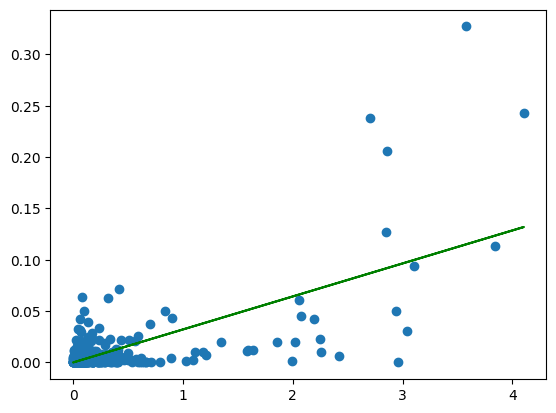

In [7]:
_x, _y = np.log1p(x), [abs(i) for i in y]
parameter = np.polyfit(_x, _y, 1)
_y2 = parameter[0] * _x + parameter[1]
plt.scatter(_x, _y)
plt.plot(_x, _y2, color='g')

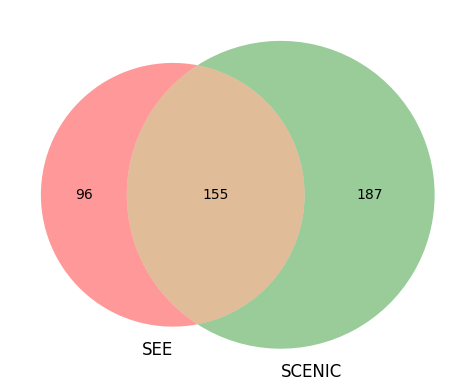

In [16]:
from matplotlib_venn import venn2

_gene_names = gene_names & set(genes['name'])
_genes = genes[genes['name'].isin(_gene_names)].copy()
_adj = scenic_adjacencies[
    (scenic_adjacencies['TF'].isin(_gene_names))&(scenic_adjacencies['target'].isin(analysis_gene_names))]

_genes['value'] = abs(_genes['value'])
predict_tf = set(_genes.sort_values('value', ascending=False).head(int(_genes.shape[0]*.1))['name'].unique())
SCENIC_tf = set(_adj.sort_values('importance', ascending=False).head(int(_genes.shape[0]*.1))['TF'].unique())

venn2(subsets = [predict_tf, SCENIC_tf], set_labels = ('SEE', 'SCENIC'))